In [2]:
#cvxopt 패키지의 quadratic programming solver
from cvxopt import matrix, solvers # solvers 안에 qp라는 이차계획법 해결 메소드가 있음

# 행렬과 벡터 정의
H = 2*matrix([[1., 0.],[0., 1.]]) # 목적함수의 x에서 구함
f = matrix([0.0, 0.0]) # 목적함수의 상수에서 구함
A = matrix([[0.0, 0.0],[0.0,-1.0]]) # 부등식 제약 조건의 식부분
a = matrix([0.0,-3/4.0]) # 부등식 제약 조건의 값 부분
B = matrix([1.0, 1.0], (1,2)) # 등식 제약 조건의 식부분
b = matrix(1.0) # 등식 제약 조건의 값 부분

sol = solvers.qp(H,f,A,a,B,b) # 값을 qp에 넣어준다
print('해\n','x_1 = ', sol['x'][0]) # 첫번째 값은 x의 [0]
print('x_2 = ',sol['x'][1]) # 두번째 값은 x의 [1]

     pcost       dcost       gap    pres   dres
 0:  5.0500e-01  7.4500e-01  2e+00  2e+00  1e+00
 1:  6.5416e-01  6.2320e-01  6e-02  2e-02  1e-02
 2:  6.2605e-01  6.2500e-01  1e-03  2e-04  1e-04
 3:  6.2501e-01  6.2500e-01  1e-05  2e-06  1e-06
 4:  6.2500e-01  6.2500e-01  1e-07  2e-08  1e-08
Optimal solution found.
해
 x_1 =  0.2499998949427826
x_2 =  0.7500001050572175


In [3]:
# SVM 적용
from cvxopt import matrix, solvers, mul, spmatrix 
import numpy as np

x = np.array([[1.,6.], [1.,8.], [4.,11.], [5.,2.], [7.,6.], [9.,3.]]) # 입력데이터. 배열 만들기
xt = np.transpose(x) # 전치 행렬
XXt = np.dot(x,xt) # 행렬 곱셈
y = np.array([[1.],[1.],[1.],[-1.],[-1.],[-1.]]) # 출력 데이터
yt =np.transpose(y) # 전치행렬
yyt =np.dot(y,yt) # 행렬 곱셈
H = np.multiply(XXt, yyt) # 원소별로 곱하기
H = matrix(H) # 매트릭스로 만든다

f = matrix([-1.,-1.,-1.,-1.,-1.,-1.], (6,1), 'd') # f
A = np.diag([-1.0, -1.0, -1.0, -1.0, -1.0,-1.0]) # 대각행렬이 -1인 A
A = matrix(A) # A
a = matrix([0.,0., 0., 0., 0., 0.], (6,1), 'd') #a
B = matrix([1, 1, 1,-1,-1,-1], (1,6), 'd') #B
b = matrix(0.0, (1,1), 'd')#b

sol = solvers.qp(H, f ,A, a, B, b) # 이차식 계획법 사용
print('Wn', 'alpha_1 = ', sol['x'][0]) # 첫번째 
print(' alpha_2 = ', sol['x'][1]) # 두번째 -서포트 백터 아님
print(' alpha_3 = ', sol['x'][2]) # 세번째 
print(' alpha_4 = ', sol['x'][3]) # 네번째 -서포트 백터 아님
print(' alpha_5 = ', sol['x'][4]) # 다섯번째 
print(' alpha_6 = ', sol['x'][5])# 여섯번째 -서포트 백터 아님

     pcost       dcost       gap    pres   dres
 0: -5.8851e-01 -9.5401e-01  1e+01  3e+00  1e+00
 1:  1.0936e-01 -2.7721e-01  1e+00  2e-01  1e-01
 2: -1.0193e-02 -1.6427e-01  2e-01  2e-17  1e-15
 3: -5.9759e-02 -8.2428e-02  2e-02  2e-17  7e-16
 4: -7.5097e-02 -7.5777e-02  7e-04  1e-17  9e-16
 5: -7.5551e-02 -7.5558e-02  7e-06  3e-17  9e-16
 6: -7.5556e-02 -7.5556e-02  7e-08  1e-17  9e-16
Optimal solution found.
Wn alpha_1 =  0.035555568361169514
 alpha_2 =  3.260954046489426e-08
 alpha_3 =  0.03999994258040855
 alpha_4 =  3.8469361559127326e-08
 alpha_5 =  0.0755554825775736
 alpha_6 =  2.2504183365251158e-08


     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  4e-16  9e-15
 6: -4.0061e+00 -4.0104e+00  4e-03  1e-15  6e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  4e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  2e-15  7e-15
Optimal solution found.
training
 [[29  0]
 [ 0 34]]
test
 [[29  0]
 [ 0 34]]


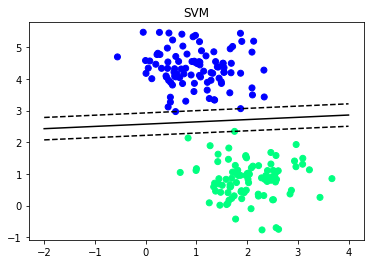

In [7]:
#SVM 구현
import numpy as np 
import cvxopt
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix

class SVM: # 클래스 생성
  def fit(self, X, y):# 학습 시키는 함수
    n_samples, n_features = X.shape
    K = np.zeros((n_samples, n_samples)) # 0으로 초기화
    for i in range(n_samples): # 데이터 수 만큼 반복 i
       for j in range(n_samples): # 데이터 수 만큼 반복 j
           K[i,j] = np.dot(X[i], X[j]) # 행렬 곱셈
    H = cvxopt.matrix(np.outer(y, y) * K) # H
    f = cvxopt.matrix(np.ones(n_samples) * -1) # f 
    B = cvxopt.matrix(y,(1, n_samples)) # B
    b = cvxopt.matrix(0.0)  # b
    A = cvxopt.matrix(np.diag(np.ones(n_samples) * -1)) # A 
    a = cvxopt.matrix(np.zeros(n_samples)) #a
    solution = cvxopt.solvers.qp(H, f, A, a, B, b) # 이차계획법 사용

    a = np.ravel(solution['x'])  # 1차원으로 만들기
    sv = a > 1e-5 # 알파 값

    ind = np.arange(len(a))[sv] # 배열로 반환
    self.a = a[sv] 
    self.sv = X[sv] 
    self.sv_y = y[sv] 
    self.b = 0 # 절편 
    for n in range(len(self.a)):
        self.b += self.sv_y[n]
        self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv]) 
    self.b/= len(self.a) 
    self.w = np.zeros(n_features) # 가중치
    for n in range(len(self.a)):
        self.w += self.a[n] * self.sv_y[n] * self.sv[n]

  def project(self,X):
    return np.dot(X, self.w) + self.b # 행렬 곱셈

  def predict(self,X):
    return np.sign(self.project(X)) # 음양값. +1 or -1

X, y = make_blobs(n_samples=250, centers=2 , random_state=0, cluster_std=0.60) # 군집 2개로 만들기 데이터는 250개 분산은 0.6
y[y == 0] = -1 # 0값을 -1로변환
y = y.astype(float) # 실수형으로 타입 변환
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0 ) # 데이터 분할 

svm = SVM() # 서포트 벡터 머신 사용
svm.fit(X_train, y_train) # 학습

def f(x, w, b, c=0): # 계산식 함수
   return (-w[0] *x - b + c) / w[1] 
    
plt.scatter(X_train[:, 0], X_train[:,1],c=y_train, cmap='winter') # 데이터 점으로 표시

a0 = -2; a1 = f(a0, svm.w, svm.b) # w.x+b=0
b0 = 4; b1 = f(b0, svm.w, svm.b) # 가운데 중심 선
plt.plot([a0,b0], [a1,b1], 'k')  # 그리기

a0 = -2; a1 = f(a0, svm.w, svm.b, 1) # w.x+b=1
b0 = 4; b1 = f(b0, svm.w, svm.b, 1) # 서포트 벡터
plt.plot([a0,b0], [a1,b1], 'k--') # 점찍기

a0 = -2; a1 = f(a0, svm.w, svm.b, -1) # w.x+b=-1
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)# 서포트 벡터
plt.plot([a0,b0], [a1,b1], 'k--')  # 점찍기

y_pred = svm.predict(X_test) # 예측
print('training\n', confusion_matrix(y_test, y_pred)) # 혼동행렬
y_pred = svm.predict(X_test) # 예측
print('test\n', confusion_matrix(y_test ,y_pred))# 혼동행렬
       
plt.title('SVM') # 그래프 이름
plt.show()# 그래프 출력

training data = Wn [[95  1]
 [ 3 88]]
testing data = Wn [[29  0]
 [ 1 33]]


Text(0.5, 1.0, 'Linear SVM')

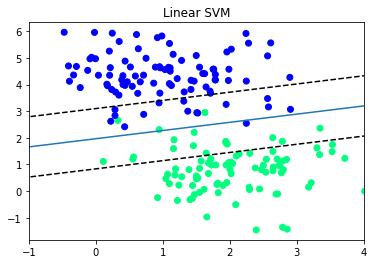

In [13]:
# 선형분리불가문제의 SVM
import numpy as np 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt 
from sklearn.svm import LinearSVC # 선형
from sklearn.metrics import confusion_matrix

X, y = make_blobs(n_samples=250, centers=2, random_state=0, cluster_std=0.85) # 반달모양 데이터 생성. 부류 2개
y[y == 0] = -1 # 0값을 -1로 변환
y = y.astype(float) # 타입 변환
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 데이터 분할

svc = LinearSVC(C=0.5)  # 선형 결정경계. c가 크면 엄격. 작으면 허용
svc.fit(X_train, y_train) # 학습

y_pred = svc.predict(X_train) # 학습 데이터에 대해 예측 
print('training data = Wn', confusion_matrix(y_train, y_pred)) # 혼동행렬

y_pred = svc.predict(X_test) # 테스트 데이터에 대해 예측
print('testing data = Wn', confusion_matrix(y_test, y_pred)) # 혼동행렬 
plt.show()

def f(x, w, b, c=0): # 계산식 함수
  return(-w[0] * x - b + c) / w[1]

# 데이터를 그리고 축을 설정하여 위치를 파악할 수 있음
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter'); # 데이터 점으로 표시
ax = plt.gca() #Get current axes 
xlim = ax.get_xlim() # 축설정
w = svc.coef_[0] 
a = -w[0] / w[1] 
xx = np.linspace(xlim[0], xlim[1])  # 중심
yy = a * xx - svc.intercept_[0] / w[1] 
plt.plot(xx, yy) 
yy = a * xx - (svc.intercept_[0] - 1) / w[1] # 1 
plt.plot(xx, yy, 'k--') 
yy = a * xx - (svc.intercept_[0] + 1) / w[1] # -1
plt.plot(xx, yy, 'k--') 
plt.xlim(-1,4) # x축 범위
plt.title('Linear SVM')# 그래프 이름

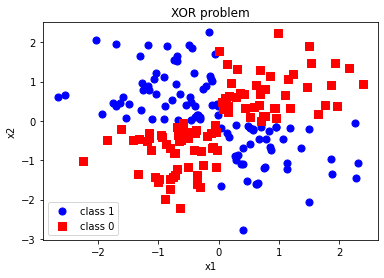

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'сmap'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'сmap'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'сmap'
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'сmap'
  # This is added back by InteractiveShellApp.init_path()


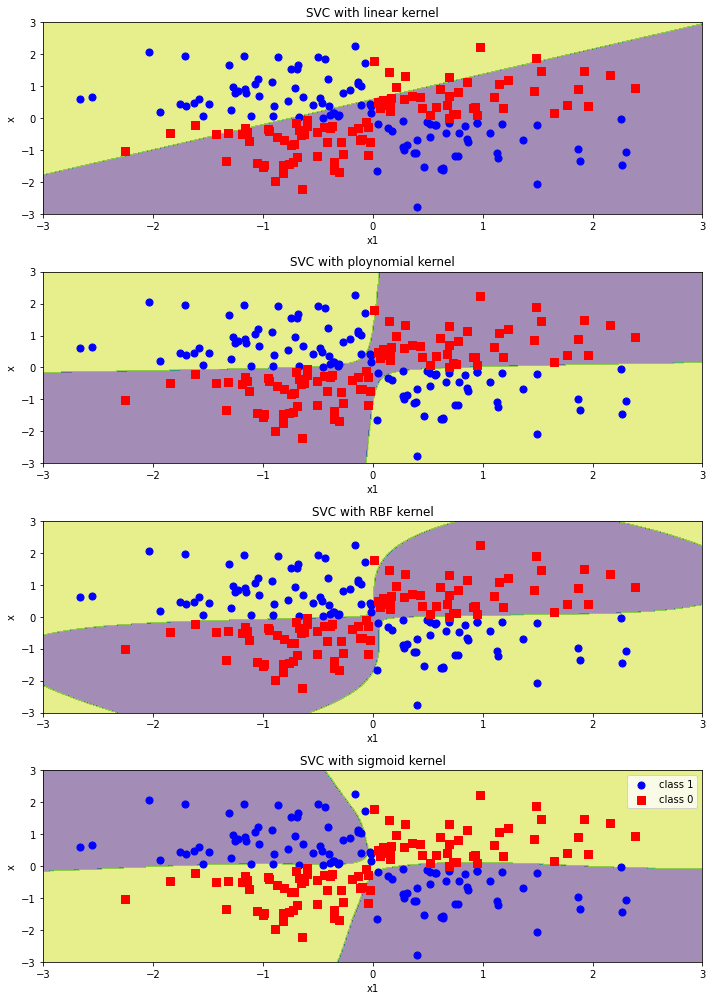

In [9]:
# XOR 문제
import numpy as np 
import matplotlib as mpl 
from matplotlib import pyplot as plt 
from sklearn.svm import SVC # 다양한 커널 사용가능

def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3): # xor 함수
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
          np.arange(ymin, ymax, (ymax-ymin)/1000)) # 메시 그리드
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape) #기존 데이터는 유지하고 차원과 형상을 바꿈
  plt.contourf(XX, YY, ZZ, сmap=mpl.cm.Paired_r, alpha=0.5) # 등고선 표시
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='o', label = 'class 1', s = 50) # 파란색은 1
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='s', label='class 0', s=50) # 빨간색은 0
  plt.xlim(xmin, xmax) # x축 범위
  plt.ylim(ymin, ymax) # y축 범위
  plt.title(title) # 그래프
  plt.xlabel("x1") # x축이름
  plt.ylabel("x")# y축이름

# 데이터 생성
np.random.seed(0) # 램덤 시드 생성
X_xor = np.random.randn(200, 2) # 데이터 생성
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0) # 두 배열의 원소가 서로 같지 않으면 True를 반환
y_xor = np.where(y_xor, 1, 0) # 조건에 해당하는 색인(index) 값을 찾기 
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='o', label='class 1', s=50) # 파란색은 1
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='r', marker='s', label='class 0', s=50) # 빨간색은 0
plt.legend() # 레전드 위치 조정
plt.xlabel("x1")  # x축이름
plt.ylabel("x2") # y축이름
plt.title("XOR problem") # 그래프
plt.show() # 그래프 출력lt.show() # 그래프 출력

# 커널의 종류와 파라미터를 지정해주면 사용할 수 있음 
svc = SVC(kernel="linear").fit(X_xor, y_xor) # 선형 커널
polysvc = SVC(kernel="poly", degree=2, gamma=1, coef0=0).fit(X_xor, y_xor) # 다항식 커널
rbfsvc = SVC(kernel="rbf").fit(X_xor, y_xor) #  Radial Basis Function
sigmoidsvc = SVC(kernel="sigmoid", gamma=2, coef0=2).fit(X_xor, y_xor) # 시그모이드 커널

plt.figure(figsize=(10, 14)) # 그림 그리기
plt.subplot(411) # 서브플롯 생성
plot_xor(X_xor, y_xor, svc, "SVC with linear kernel") # xor 선형 서포트 벡터 머신
plt.subplot(412) # 서브플롯 생성
plot_xor(X_xor, y_xor, polysvc, "SVC with ploynomial kernel")  # xor 다항 서포트 벡터 머신
plt.subplot(413) # 서브플롯 생성
plot_xor(X_xor, y_xor, rbfsvc, "SVC with RBF kernel")  # xor Radial Basis Function 서포트 벡터 머신
plt.subplot(414) # 서브플롯 생성
plot_xor(X_xor, y_xor, sigmoidsvc, "SVC with sigmoid kernel") # xor 시그모이드 서포트 벡터 머신
plt.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정
plt.legend()# 레전드 위치 조정
plt.show() # 그래프 출력

In [11]:
# 당뇨병 판정 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

pdiabetes = pd.read_csv('diabetes.csv', header=None) # 파일 데이터 읽어오기
print(pdiabetes[0:5])# 앞에서 5개 출력

x = pdiabetes.iloc[1:,:8] # 입력
y = pdiabetes.iloc[1:,8:].values.flatten() # 출력 
print('x shape: ', x.shape,' y shape:', y.shape) # 모양 출력

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0) # 데이터 분할 
std_scl = StandardScaler() # 객체 생성
std_scl.fit(x_train)  # 학습

x_train = std_scl.transform(x_train) # 학습 데이터부분 변환
x_test = std_scl.transform(x_test) # 테스트 데이터부분 변환

svc = SVC(kernel='rbf') # Radial Basis Function SVC
svc.fit(x_train, y_train) # 학습

print('학습 데이터 정확도 : ', svc.score(x_train, y_train)) # 학습 데이터 정확도 출력
print('테스트 데이터 정확도 : ', svc.score(x_test, y_test))  # 테스트 데이터 정확도 출력

             0        1              2  ...                         6    7        8
0  Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
1            6      148             72  ...                     0.627   50        1
2            1       85             66  ...                     0.351   31        0
3            8      183             64  ...                     0.672   32        1
4            1       89             66  ...                     0.167   21        0

[5 rows x 9 columns]
x shape:  (768, 8)  y shape: (768,)
학습 데이터 정확도 :  0.8246527777777778
테스트 데이터 정확도 :  0.7760416666666666


In [12]:
# 버섯 데이터 분류
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

mushroom=pd.read_csv('mushrooms.csv', header=None) # 데이터 파일 읽어오기
print(mushroom.head(4)) # 4개 출력

X=[] # 배열
Y=[]# 배열
for idx, row in mushroom[1:].iterrows(): # 현재 인덱스와 시리즈 정보가 반복
  Y.append(row.loc[0]) # 부류
  row_x=[] 
  for v in row.loc[1:]:# 1부터 값이 저장되어 있으므로 [1:]
    row_x.append(ord(v)) # 아스키 코드로 변환
  X.append(row_x) # 속성 누적 저장

print('\n속성: \n', X[0:3]) # 속성을 3개 출력
print('\n부류: \n', Y[0:3]) # 부류를 3개 출력
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25) # 데이터 분할. 테스트 데이터는 0.25

svc=SVC() # 커널지정 안하면 rbf로 자동 사용
svc.fit(x_train, y_train) # 학습


print('학습 데이터 정확도: ', svc.score(x_train, y_train))# 학습 데이터 정확도 출력
print('테스트 데이터 정확도: ', svc.score(x_test, y_test)) # 테스트 데이터 정확도 출력

      0          1            2   ...                 20          21       22
0  class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
1      p          x            s  ...                  k           s        u
2      e          x            s  ...                  n           n        g
3      e          b            s  ...                  n           n        m

[4 rows x 23 columns]

속성: 
 [[120, 115, 110, 116, 112, 102, 99, 110, 107, 101, 101, 115, 115, 119, 119, 112, 119, 111, 112, 107, 115, 117], [120, 115, 121, 116, 97, 102, 99, 98, 107, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 103], [98, 115, 119, 116, 108, 102, 99, 98, 110, 101, 99, 115, 115, 119, 119, 112, 119, 111, 112, 110, 110, 109]]

부류: 
 ['p', 'e', 'e']
학습 데이터 정확도:  0.9950763170851797
테스트 데이터 정확도:  0.9955686853766618


SVM 분류 결과 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97    

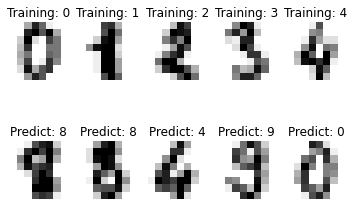

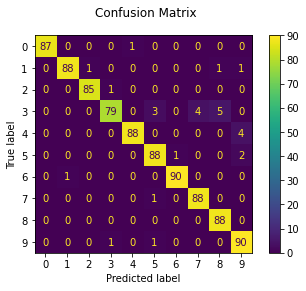

In [6]:
# 필기숫자 인식 SVM
import matplotlib.pyplot as plt 
from sklearn import datasets, svm, metrics 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

digits = datasets.load_digits() # 숫자 데이터 불러오기 8*8
_, axes = plt.subplots(2, 5) # 서브플롯 생성
images_and_labels = list(zip(digits.images, digits.target)) # 동일한 개수로 이루어진 자료형을 묶어서 리스트로 만든다
for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):# 이미지 5개 출력
  ax.set_axis_off() # axis 지우기
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') # 이미지 출력 0,1,2,3,4 
  ax.set_title('Training: %i' % label) # 각 이미지 이름

n_samples = len(digits.images) # 길이
data = digits.images.reshape((n_samples, -1)) # 데이터 모양 바꾸기 64원소 크기로

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False) # 데이터 분할. 학습 데이터 50%
classifier = svm.SVC(kernel='rbf', gamma=0.001) # 커널로 Radial Basis Function을 사용하고 감마값은 0.001로 지정
classifier.fit(X_train, y_train)# 학습

predicted = classifier.predict(X_test) # 예측

test_data = X_test.reshape((len(X_test),8,8))  # 64원소로 바꾼것을 다시 8*8로 바꾼다
images_and_predictions = list(zip(test_data, predicted)) #동일한 개수로 이루어진 자료형을 묶어서 리스트로 만든다
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:5]):# 예측 이미지 5개 출력
  ax.set_axis_off()# axis 지우기
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')# 예측이미지 출력
  ax.set_title('Predict: %i' % prediction) # 예측 이미지 이름

print("SVM 분류 결과 %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted))) # 분류 결과 출력. 다양한 특성들이 출력됨
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test) # 혼동행렬을 그래프 형태로 출력
disp.figure_.suptitle("Confusion Matrix") # 혼동행렬 그래프 이름 출력
print("혼동 행렬:\n%s" % disp.confusion_matrix) #혼동행렬 출력
print("정확도 : ", accuracy_score(y_test, predicted)) # 정확도 출력
plt.show()# 그래프 출력


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
{'svc__C': 5, 'svc__gamma': 0.005}
                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.69      0.81        16
     Colin Powell       0.87      0.85      0.86        61
  Donald Rumsfeld       0.75      0.69      0.72        35
    George W Bush       0.77      0.97      0.86       125
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       1.00      0.68      0.81        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.93      0.74      0.83        35

         accuracy                           0.83       337
        macro avg       0.90      0.76      0.81       337
     weighted avg       0.84      0.83      0.83       337



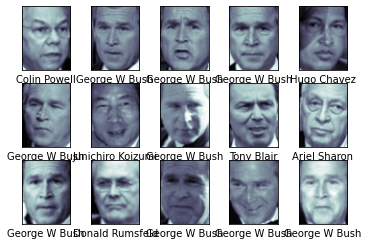

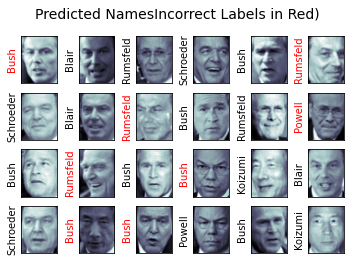

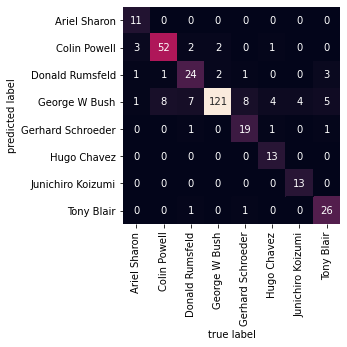

정확도:  0.827893175074184


In [7]:
# 얼굴 인식 SVM
from sklearn.datasets import fetch_lfw_people 
from sklearn.svm import SVC 
from sklearn.decomposition import PCA as RandomizedPCA # 전처리를 위해 사용
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV 
import seaborn as sns 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

faces = fetch_lfw_people(min_faces_per_person=60)  # 최소 60장의 사진이 있는 사람의 데이터만 이용
print(faces.target_names) # 이미지 이름 출력
print(faces.images.shape) # 이미지 크기 출력
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=0) # 데이터 분할

# 이미지 출력
fig, ax = plt.subplots(3, 5) # 서브플롯 생성
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone') 
  axi.set(xticks=[ ], yticks=[ ], # 눈금값 설정
          xlabel=faces.target_names[faces.target[i]])

pca = RandomizedPCA(n_components=150, whiten=True, random_state=0) # 150차원
svc = SVC(kernel='rbf', class_weight='balanced') # # 커널로 Radial Basis Function을 사용. 가중치는 balanced
model = make_pipeline(pca, svc)# 150차원으로 바꾼 데이터를 이용해 svc 적용해 모델로 지정

param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} # 파라미터를 사용해서 각각의 조합 중 가장 적합한 것을 사용할 수 있게 함
grid = GridSearchCV(model, param_grid) # 입력데이터에대해 각각의 조합을 적용함
grid.fit(Xtrain, ytrain) #학습
print(grid.best_params_) # 가장 좋은 파라미터 출력
model = grid.best_estimator_ # 가장 좋은 측정을 모델로 설정
yfit = model.predict(Xtest)# 예측

fig, ax = plt.subplots(4, 6)  # 서브플롯 생성
for i, axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone') # 이미지 출력
  axi.set(xticks=[ ], yticks=[ ]) # 눈금값 설정
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')  # 맞은 것은 블랙으로 표시
fig.suptitle('Predicted NamesIncorrect Labels in Red)', size=14);  # 잘못된것은 빨간색으로 표시
print(classification_report(ytest, yfit, target_names=faces.target_names)) # 보고서 출력
plt.show()

mat = confusion_matrix(ytest, yfit) # 혼동행렬
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names, yticklabels=faces.target_names) # 히트맵으로 보여주기
plt.xlabel('true label') # x축 이름
plt.ylabel('predicted label'); # y축 이름
plt.show() # 그래프 출력
from sklearn.metrics import accuracy_score
print('정확도: ', accuracy_score(ytest,yfit)) # 정확도 출력